In [1]:
try:
    import jax.numpy as jnp
    from jax import random
except:
    %pip install jax jaxlib
    import jax.numpy as jnp
    from jax import random

try:
    import matplotlib.pyplot as plt
except:
    %pip install matplotlib
    import matplotlib.pyplot as plt

try:
    from scipy.stats import t, laplace, norm
except:
    %pip install scipy
    from scipy.stats import t, laplace, norm

try:
    import seaborn as sns
except:
    %pip install seaborn
    import seaborn as sns

In [2]:
import os

LATEXIFY = "LATEXIFY" in os.environ

if LATEXIFY:

    import sys

    # Don't change to "../scripts", instead, run this nb from repo's root with ipython
    sys.path.append("scripts")
    from plot_utils import latexify, savefig

    latexify(width_scale_factor=2, fig_height=2.0)

In [3]:
def plot_outlier_effect(
    save_name,
    outliers=[],
    bins=7,
    ss_norm_dist=30,
    ss_graph_xaxis=500,
    range_xaxis=[-5, 10],
    fig=None,
    ax=None,
):
    """
    Sample from a normal distribution and plot the the PDF for
    normal distribution, laplacian distribution and the student T
    distribution. The function plots/saves data for normal
    distribution. If outliers are provided, we see the
    robustness of the studennt T distribution compared to
    the normal distribution.


    Args:
    ----------
    save_name : string
        The PDF filenames to save the graphs

    outliers :  list, default=[]
        A list of outlier values

    bins : int, default=7
        Value of bin size for normal distribution histogram

    ss_norm_dist : int, default=30
        Number of samples to be taken from the normal distribution

    ss_graph_xaxis : int, default=500
        Number of values for the x-axis i.e the values the
        random variable can take

    range_xaxis : list, default=[-5, 10]
        The range of values for the x-axis

    fig : None
        Will be used to store matplotlib figure

    ax : None
        Will be used to store matplotlib axes

    Returns:
    ----------
    fig : matplotlib figure object
        Stores the graph data displayed

    ax : matplotlib axis object
        Stores the axes data of the graph displayed
    """

    # Genrate Samples from normal distribution
    norm_dist_sample = random.normal(random.PRNGKey(42), shape=(ss_norm_dist,))

    # Genrate values for x axis i.e. the values your random variable can take
    x_axis = jnp.linspace(range_xaxis[0], range_xaxis[1], ss_graph_xaxis)

    # Set figure width and height
    fig, ax = plt.subplots()

    if outliers:
        samples = jnp.hstack((norm_dist_sample, jnp.array(outliers)))

        # Plot the data from normal distribution
        ax.hist(
            norm_dist_sample,
            bins,
            weights=[1 / (norm_dist_sample.shape[0] + len(outliers))] * norm_dist_sample.shape[0],
            rwidth=0.8,
        )

        # Plot outlier data
        ax.hist(
            outliers,
            len(outliers),
            weights=[1 / (norm_dist_sample.shape[0] + len(outliers))] * len(outliers),
            rwidth=0.8,
        )
    else:
        samples = norm_dist_sample

        # Plot the data from normal distribution
        ax.hist(
            norm_dist_sample,
            bins,
            weights=[1 / norm_dist_sample.shape[0]] * norm_dist_sample.shape[0],
            rwidth=0.8,
        )

    # Calculate mean and standard deviation for different distributions and then
    # find the PDF for each distributions
    loc, scale = norm.fit(samples)
    n = norm.pdf(x_axis, loc=loc, scale=scale)

    loc, scale = laplace.fit(samples)
    l = laplace.pdf(x_axis, loc=loc, scale=scale)

    fd, loc, scale = t.fit(samples)
    s = t.pdf(x_axis, fd, loc=loc, scale=scale)

    # Find range of values for PDF i.e y-axis
    y_all_data = jnp.concatenate((n, l, s))
    y_range = [jnp.round(jnp.min(y_all_data), 1), jnp.round(jnp.max(y_all_data), 1)]

    # Update tick intervals for x-axis
    ax.set_xticks(jnp.arange(range_xaxis[0], range_xaxis[1] + 1, 5))

    # Update the tick intervals and limit for y-axis
    ax.set_ylim(y_range)
    ax.set_yticks(jnp.linspace(y_range[0], y_range[1], 5))

    # Plot the different PDF's obtained
    ax.plot(x_axis, n, "k:", x_axis, s, "r-", x_axis, l, "b--")

    # Update the Legend and the axis labels
    ax.legend(("gaussian", "student T", "laplace"), fontsize=12)
    ax.set_xlabel("$x$")
    ax.set_ylabel("$PDF$")

    sns.despine()

    # Save figure to PDF files
    if LATEXIFY and len(save_name) > 0:
        savefig(save_name)

    return fig, ax

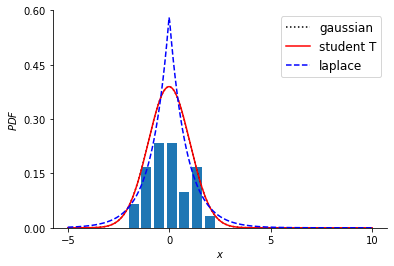

In [4]:
_, _ = plot_outlier_effect(save_name="robust_pdf_plot_latexified.pdf")

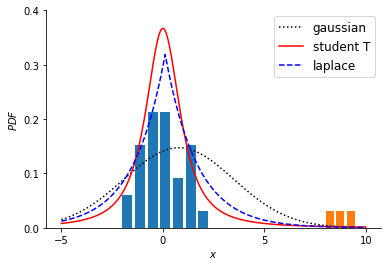

In [5]:
_, _ = plot_outlier_effect(save_name="robust_pdf_plot_outliers_latexified.pdf", outliers=[8, 8.75, 9.5])